# TITANIC PROJECT

***OBJECTIVE:*** The Titanic data is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. We have information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, we predict if an arbitrary passenger on Titanic would survive the sinking or not. 

### IMPORTING DATA AND LIBRARIES

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

In [355]:
#importing data and saved to variable ti_data.
ti_data=pd.read_csv('titanicdata.csv')
ti_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [356]:
ti_data.shape

(891, 12)

## EXPLORATORY DATA ANALYSIS

In [357]:
#Loading datas to pandas DataFrame
df=pd.DataFrame(data=ti_data)

In [358]:
#Checking Data types to identify if strings/objects is present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Data Observations:***
1.Here we can see 5 objects-Name,Sex,Ticket,Cabin and Embarked. objects are to coverted to numeric if data is relevant.
2.Also i have observed that Name,Passenger id,Cabin and Ticket are irrelevant info, and will be further evaluated.

***Columns:***
survival   :     Survival   
PassengerId: Unique Id of a passenger.   
pclass     :    Ticket class       
sex        :    Sex       
Age        :    Age in years       
sibsp      :    # of siblings / spouses aboard the Titanic       
parch      :    # of parents / children aboard the Titanic       
ticket     :    Ticket number      
fare       :    Passenger fare       
cabin      :    Cabin number       
embarked   :    Port of Embarkation  


In [359]:
#Statistical info.
df.describe()

# Age count is less, so missing values are there.
# 38% passengers survived. 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [360]:
#Checking for null values
df.isnull().sum()

# 177 nul values in Age column and 2 in embarked.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***HANDLING NULL VALUES***

In [361]:
#177 Null values in age and replacing it with mean.
#Finding mean value of age column.
mean1= df['Age'].mean()
mean1

#Replacing null values with mean.

df['Age'].replace(np.nan,mean1,inplace=True)

In [362]:
#Replacing 2 missing values in embarked with mode/most frequent
df['Embarked'].dropna()

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

***VISUALIZATION***

<AxesSubplot:xlabel='Sex', ylabel='count'>

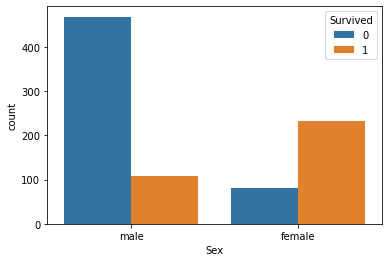

In [363]:
# Countplot sex vs survived
sns.countplot(x ="Sex", hue ="Survived", data = df) 

Female survivors are more than double the value of male. Majority non-survivors are men.

<AxesSubplot:xlabel='Survived', ylabel='count'>

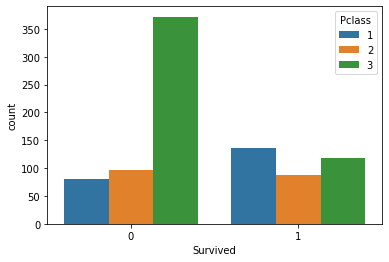

In [364]:
# Countplot Pclass vs survived
sns.countplot(x='Survived',  hue='Pclass', data=df)

Majority non-survivors were in 3rd Class, whereas almost equal number of passenger survived from Pclass 1,2,&3. Class 2 survival number and death number are same. It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

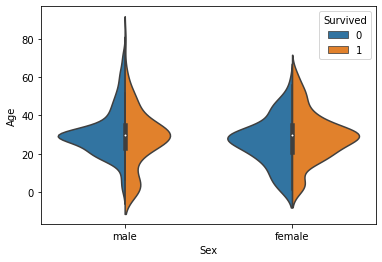

In [365]:
# Violinplot Displays distribution of data based on Age and gender.

sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = df, split = True) 


Ladies age between 20-50yrs have higher survival rate. Children-boys below 10 death rate is extremely less whereas for Children-Girls its high comparitively. For both male and female though survival rate is higher for women but death rate is approximately same.

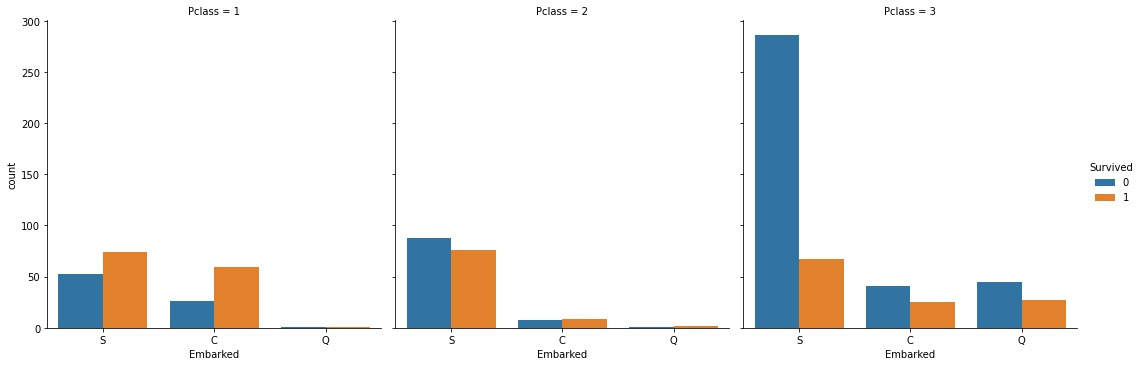

In [366]:
# Countplot 
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = df) 


Notably high death rate in Class three who is boarded from S.  
Infact majority of the passengers are boarded from S. 

<AxesSubplot:>

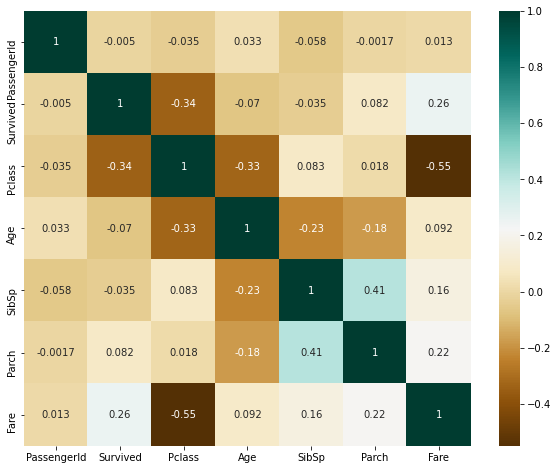

In [367]:
# Heat map to  observe correlation between all variables.

plt.figure(figsize=(10,8))
c=df.corr()
sns.heatmap(c,cmap='BrBG', annot=True)

Parch and Fare are positively correlated with Survived.  
Pclass is negatively correlated with target variable.  
Age is slightly negatively correlated. 

The columns that can be dropped are:
PassengerId, Name, Ticket, Cabin: They are strings, cannot be categorized and don’t contribute much to the outcome.

***DROPPING IRRELEVANT COLUMNS***  (Low Variance Filter)

In [368]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [369]:
df.shape

(891, 8)

In [370]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


***ENCODING***   
Getting dummy variables for each categorical variable.

In [371]:
# Get_dummies is the method that creates dummy variable for each categorical variable, 
# Machine algorithms only work in Numeric data.

pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [372]:
# There are 2 columns identified non-numerical and creating dummy values for it.
sex= pd.get_dummies(df['Sex'],drop_first=True)
embark= pd.get_dummies(df['Embarked'],drop_first=True)

In [373]:
# Dropping original cateorical variables from dataset.
df.drop(['Sex','Embarked'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [374]:
# Adding dummy values to dataset. 
df= pd.concat([df,sex,embark], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Data is ready for Modelling.

### MODELLING DATA

In [375]:
# Separating dependent and independent variable.

y= df['Survived']
x= df.drop('Survived',axis=1)

In [376]:
# Train test split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.30, random_state=42)

**LOGISTIC REGRESSION** 

In [377]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)
predlr= lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8097014925373134
[[136  21]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



**DECISION TREE CLASSIFIER**

In [378]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.75
[[126  31]
 [ 36  75]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       157
           1       0.71      0.68      0.69       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



**CROSS VALIDATING SCORES**

In [379]:
# Cross Validating Logistic Regression
scr1= cross_val_score( lr,x,y, cv=10)
print("Cross Validated score for LR is:",scr1.mean())

# Cross Validating DTC
scr2= cross_val_score( dtc,x,y, cv=10)
print("Cross Validated score for DTC is:",scr2.mean())

Cross Validated score for LR is: 0.7946317103620475
Cross Validated score for DTC is: 0.7766791510611736


**FINDING BEST PARAMETER**

In [380]:
#Tuning the hyperparameters for Logistic Regression model using GridSearch.
#Grid
parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}
#Gridsearch
gridsearch = GridSearchCV(lr, parameter_grid)
gridsearch.fit(x_train, y_train);

#Get best hyperparameters
gridsearch.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [381]:
#Let’s run our LR again with the best parameters.
lr2 = LogisticRegression(C = 0.1, penalty= 'l2')
lr2.fit(x_train, y_train)
pred_lr2 = lr2.predict(x_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_lr2))
print('Classification report')
print(classification_report(y_test, pred_lr2))
print('Accuracy score',accuracy_score(y_test, pred_lr2))

Confusion matrix
[[140  17]
 [ 30  81]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       157
           1       0.83      0.73      0.78       111

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268

Accuracy score 0.8246268656716418


**With hyperparameter tuning, Accuracy score of LogisticRegression improved to 82.4% from 79.4%**

### SAVING THE BEST MODEL

In [382]:
import pickle
# save the model to disk
filename = 'finalized_model_LR.pkl'
pickle.dump(lr,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)